Пожалуй, каждый из нас практически ежедневно смотрит прогноз погоды: будет сегодня тепло или холодно, брать ли зонт? Мы расстраиваемся, если внезапно идёт дождь, а мы оказались к этому не готовы. Иногда можно понять, что будет дождь, просто взглянув на небо, но часто такие предположения оказываются неверными. Надёжнее всего пользоваться прогнозами, которые публикуют специалисты. А задумывались ли вы, как формируются эти прогнозы?  

Да-да, здесь тоже не обошлось без машинного обучения. В этом юните мы с вами немного коснёмся метеорологии, чтобы предсказать, будет ли дождь в Австралии. Попутно вы узнаете, какие факторы влияют на вероятность дождя — возможно, вы научитесь предсказывать его точнее, чем метеорологические службы, и больше никогда не окажетесь в нужный момент без зонта.

Данные содержат 23 признака и 145 460 наблюдений. Из этих 23 признаков шесть — категориальные, в одном записана дата, а остальные являются непрерывными числовыми данными.

        Примеры числовых признаков: температура, скорость ветра, влажность, облачность, атмосферное давление в разное время суток, количество осадков, испарение, количество часов с солнечной погодой.
        Примеры категориальных признаков: местоположение, направление ветра в разное время суток, наличие дождя сегодня или завтра.

Целевой переменной является столбец RainTomorrow. Значение этой переменной мы и будем пытаться предсказать.



        Date — дата, в которую зафиксировано наблюдение;
        Location — местонахождение метеорологической станции;
        MinTemp — минимальная температура (℃);
        MaxTemp — максимальная температура (℃);
        Rainfall — количество осадков (дождь) за сутки (мм);
        Evaporation — количество испарений до 9 утра (мм);
        Sunshine — количество часов в сутках, когда светило солнце;
        WindGustDir — направление самого сильного порыва ветра за последние 24 часа;
        WindGustSpeed — скорость самого сильного порыва ветра за последние 24 часа;
        WindDir9am — направление ветра в 9 утра;
        WindDir3pm — направление ветра в 3 часа дня;

        WindSpeed9am — скорость ветра в 9 часов утра;
        WindSpeed3pm — скорость ветра в 3 часа дня;
        Humidity9am — влажность в 9 утра;
        Humidity3pm — влажность в 3 часа дня;
        Pressure9am — атмосферное давление в 9 утра;
        Pressure3pm — атмосферное давление в 3 часа дня;
        Cloud9am — часть неба, закрытая облаками, в 9 утра;
        Cloud3pm — часть неба, закрытая облаками, в 3 часа дня;
        Temp9am — температура в 9 утра;
        Temp3pm — температура в 3 часа дня;
        RainToday — наличие дождя в этот день;
        RainTomorrow — наличие дождя на следующий день.



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import tree #деревья решений
from sklearn import ensemble #ансамбли
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка

from sklearn.model_selection import GridSearchCV

In [ ]:
data_weather = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ансамблирование. Пайплайны/weatherAUS.zip')
data_weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
data_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Сколько суммарно пропусков в данных?

In [ ]:
null_data = data_weather.isnull().sum()
null_data.sum()

343248

Можно отметить, что в данных много пропусков, но для нас это не проблема, так как случайный лес прекрасно работает в таких ситуациях, и скоро у нас будет возможность в этом убедиться.

В некоторых признаках пропусков более 40 % — удалите такие признаки. Сколько их было?

In [ ]:
thresh = round(data_weather.shape[0]*0.6)
thresh

87276

In [ ]:
data_weather.dropna(axis=1, thresh=thresh, inplace=True)
data_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   WindGustDir    135134 non-null  object 
 6   WindGustSpeed  135197 non-null  float64
 7   WindDir9am     134894 non-null  object 
 8   WindDir3pm     141232 non-null  object 
 9   WindSpeed9am   143693 non-null  float64
 10  WindSpeed3pm   142398 non-null  float64
 11  Humidity9am    142806 non-null  float64
 12  Humidity3pm    140953 non-null  float64
 13  Pressure9am    130395 non-null  float64
 14  Pressure3pm    130432 non-null  float64
 15  Cloud9am       89572 non-null   float64
 16  Temp9am        143693 non-null  float64
 17  Temp3pm        141851 non-nul

Теперь обработаем признаки RainToday и RainTomorrow таким образом, чтобы вместо yes было значение 1, а вместо no — значение 0. Обратите внимание на то, что в признаке RainTomorrow присутствуют пропуски, и их трогать не нужно, они должны остаться пропусками. Поэтому обрабатывайте столбцы таким образом, чтобы не видоизменить пропущенные значения.

Вычислите среднее арифметическое для преобразованного признака RainToday и запишите его в ответ, предварительно округлив до двух знаков после точки-разделителя

In [ ]:
data_weather['RainTomorrow'] = data_weather['RainTomorrow'].replace('Yes','1').replace('No','0').astype(float)

In [ ]:
data_weather['RainToday'] = data_weather['RainToday'].replace('Yes','1').replace('No','0').astype(float)

In [ ]:
data_weather['RainToday'].describe().round(2)

count    142199.00
mean          0.22
std           0.42
min           0.00
25%           0.00
50%           0.00
75%           0.00
max           1.00
Name: RainToday, dtype: float64

Обработайте признак Date таким образом, чтобы выделить в отдельный признак Month (номер месяца). Изначальный признак Date удалите. Определите, в какой месяц в среднем за день выпадает больше всего дождей. В качестве ответа введите порядковый номер месяца.

In [ ]:
data_weather['Date'] = pd.to_datetime(data_weather['Date'])

In [ ]:
data_weather['Month'] = pd.DatetimeIndex(data_weather['Date']).month  # месяц
data_weather.drop(columns = 'Date', inplace = True)
data_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   WindGustDir    135134 non-null  object 
 5   WindGustSpeed  135197 non-null  float64
 6   WindDir9am     134894 non-null  object 
 7   WindDir3pm     141232 non-null  object 
 8   WindSpeed9am   143693 non-null  float64
 9   WindSpeed3pm   142398 non-null  float64
 10  Humidity9am    142806 non-null  float64
 11  Humidity3pm    140953 non-null  float64
 12  Pressure9am    130395 non-null  float64
 13  Pressure3pm    130432 non-null  float64
 14  Cloud9am       89572 non-null   float64
 15  Temp9am        143693 non-null  float64
 16  Temp3pm        141851 non-null  float64
 17  RainToday      142199 non-nul

In [ ]:
print(data_weather.groupby('Month')['RainToday'].mean().sort_values(ascending = False))

Month
7     0.270736
6     0.263638
8     0.253167
9     0.229135
5     0.222163
3     0.217135
4     0.216845
12    0.213037
11    0.210843
2     0.206746
10    0.196512
1     0.189484
Name: RainToday, dtype: float64


Обработайте оставшиеся категориальные признаки. С помощью метода get_dummies с настройками по умолчанию создайте dummy-переменные для всех категориальных признаков (их пять), которые есть в данных на этот момент.

Кодировку признаков важно выполнить именно в следующем порядке: categoricals = ['Month', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']. Это необходимо для того, чтобы ваши дальнейшие ответы сходились с нашим решением, так как алгоритм случайного леса, который мы будем использовать в дальнейшем, чувствителен к порядку столбцов.

Сколько теперь признаков в данных, если считать целевую переменную?

In [ ]:
# OHE с использованием библиотеки pandas
data_weather = pd.get_dummies(data_weather, columns=['Month', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], prefix=['Month', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [ ]:
print(list(data_weather.columns))

['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Locati

In [ ]:
data_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Columns: 124 entries, MinTemp to WindDir3pm_WSW
dtypes: float64(15), uint8(109)
memory usage: 31.8 MB


Осталось совсем немного. Удалите все строки, где есть пропуски. Далее разбейте данные на обучающую и тестовую выборки в соотношении 70/30, в качестве значения параметра random_state возьмите число 31.

Каково среднее значение целевой переменной на тестовой выборке? Ответ округлите до двух знаков после точки-разделителя.

In [ ]:
data_weather.dropna(axis=0, how='any', inplace=True)

In [ ]:
X = data_weather.drop(columns = 'RainTomorrow')
y = data_weather['RainTomorrow']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=31)

In [ ]:
y_test.mean().round(2)

0.23

In [ ]:
X_train.head(10)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
32693,18.6,24.4,2.2,44.0,24.0,22.0,71.0,59.0,1024.4,1022.0,...,0,0,0,0,0,0,0,0,0,0
23743,17.7,20.4,1.9,89.0,50.0,48.0,91.0,94.0,1013.4,1009.3,...,0,0,0,0,0,0,0,0,0,0
140472,24.5,32.8,0.2,31.0,11.0,13.0,81.0,56.0,1010.4,1007.0,...,0,0,0,0,0,0,0,0,0,0
10272,13.6,20.2,1.0,44.0,26.0,20.0,66.0,81.0,1028.3,1027.9,...,0,0,0,0,0,1,0,0,0,0
139446,22.3,33.3,0.0,37.0,13.0,20.0,73.0,28.0,1014.9,1011.0,...,0,0,0,0,0,0,0,0,0,0
23305,18.8,25.8,0.0,30.0,15.0,7.0,56.0,53.0,1020.7,1018.8,...,0,0,0,0,0,0,0,0,0,0
60489,4.8,10.7,1.0,43.0,11.0,22.0,78.0,58.0,1018.8,1020.6,...,0,0,0,0,0,0,0,0,0,1
75823,9.1,12.5,10.6,52.0,22.0,22.0,74.0,77.0,1015.9,1018.3,...,0,0,1,0,0,0,0,0,0,0
64425,8.0,18.2,0.0,69.0,35.0,46.0,71.0,45.0,1007.2,1002.2,...,0,0,0,0,0,0,0,0,0,0
99528,11.4,19.3,0.4,43.0,15.0,22.0,89.0,72.0,1013.6,1012.6,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
index_train = list(data_weather.index)
index_train[0:5]

[0, 4, 6, 11, 12]

In [ ]:
n = X_train.shape[0]
n

54779

Теперь давайте вспомним про бутстреп. Он не понадобится нам для решения этой задачи, но будет полезно реализовать его «вручную».

Сделайте оценку стандартного отклонения для среднего значения минимальной температуры для обучающей выборки (то есть для среднего значения по признаку MinTemp). Для этого сгенерируйте 1000 случайных выборок из наших данных — каждая из них должна быть такого же объёма, как и обучающая выборка. Для генерации выборки используйте np.random.randint(): сгенерируйте необходимое количество индексов и по ним извлеките соответствующие элементы выборки. Случайность фиксируйте с помощью np.random.seed(31).

Для каждой выборки вычислите среднее значение, а после найдите стандартное отклонение для этих значений. Ответ округлите до двух знаков после точки-разделителя.

In [ ]:
#list_mean = []
#np.random.seed(31)
#for i in range(1,1000):
#  my_list = []
# for j in range(0,n):
#   c = np.random.randint(n)
#    index1 = index_train[c]
#    p = data_weather.loc[index1,'MinTemp']
#    my_list.append(p)
#  my_list_mean = sum(my_list)/len(my_list)
#  list_mean.append(my_list_mean)
#print(round(np.std(list_mean),2))

Теперь можно перейти к обучению прогностических моделей. Начнём с того, что построим простейшую логистическую регрессию (без настройки гиперпараметров). Это будет та модель, с качеством которой мы будем сравнивать результаты, полученные далее, чтобы оценить превосходство случайного леса над простыми методами.

В качестве ответа введите значение метрики roc_auc на тестовой выборке. Ответ округлите до двух знаков после точки-разделителя.

In [ ]:
#Создаем объект класса логистическая регрессия
log_reg = linear_model.LogisticRegression()
log_reg.fit(X_train, y_train)
#Обучаем модель, минимизируя logloss
y_test_pred = log_reg.predict(X_test)
print('roc_auc_score на тестовом наборе: {:.2f}'.format(metrics.roc_auc_score(y_test, y_test_pred)))

roc_auc_score на тестовом наборе: 0.73


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




Теперь попробуйте обучить на наших данных другой алгоритм — дерево решений. С помощью GridSearchCV сделайте перебор гиперпараметров по следующей сетке:

params = {'max_leaf_nodes': list(range(2, 10)), 'min_samples_split': [2, 3, 4], 'max_depth': [5,7,9,11]}

Для параметра кросс-валидации cv задайте значение 3. Для решающего дерева определите параметр random_state=42. Остальные параметры оставьте по умолчанию.

1. Вычислите значение roc_auc для решающего дерева с гиперпараметрами, определёнными в качестве оптимальных. Ответ округлите до двух знаков после точки-разделителя.
нет ответа

Loading
2. Какие значения гиперпараметров были выбраны как оптимальные?

In [ ]:
params = {'max_leaf_nodes': list(range(2, 10)),
          'min_samples_split': [2, 3, 4],
          'max_depth': [5,7,9,11]
          }
grid_search = GridSearchCV(
    estimator=tree.DecisionTreeClassifier(random_state=42),
    param_grid=params,
    cv=3
)
grid_search.fit(X_train, y_train)
y_test_pred = grid_search.predict(X_test)
print('roc_auc_score на тестовом наборе: {:.2f}'.format(metrics.roc_auc_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))

roc_auc_score на тестовом наборе: 0.70
Наилучшие значения гиперпараметров: {'max_depth': 5, 'max_leaf_nodes': 9, 'min_samples_split': 2}


К сожалению, деревья решений не помогли нам в улучшении качества модели, так что попробуем ещё уменьшить ошибку с помощью ансамблей.

Теперь постройте случайный лес, включающий 100 деревьев. Задайте параметр random_state=31. Остальные параметры оставьте по умолчанию.

Какой теперь будет метрика roc_auc на тестовой выборке? Ответ округлите до двух знаков после точки-разделителя.

In [ ]:
#Создаем объект класса случайный лес
rf = ensemble.RandomForestClassifier(
    n_estimators=100,
    param_grid=params,
    random_state=31
)
#Обучаем модель
rf.fit(X_train, y_train)
#Выводим значения метрики
y_test_pred = rf.predict(X_test)
print('roc_auc_score на тестовом наборе: {:.2f}'.format(metrics.roc_auc_score(y_test, y_test_pred)))

roc_auc_score на тестовом наборе: 0.73


Основные параметры, которые отвечают за качество обучения в случайном лесе, следующие:'max_features', 'min_samples_leaf', 'max_depth'.

Возьмите случайный лес из 100 деревьев и найдите оптимальную комбинацию этих трёх параметров. Сетка для перебора следующая:

{'max_features': [ 4, 5, 6, 7], 'min_samples_leaf': [3, 5, 7, 9, 11], 'max_depth': [5, 10, 15]}

Перебор осуществите с помощью GridSearchCV. Для параметра кросс-валидации cv задайте значение 3. Случайности фиксируйте параметром random_state = 31. Остальные значения оставьте по умолчанию.

Какое значение roc_auc получилось для оптимальных гиперпараметров?

In [ ]:
params = {'max_features': [ 4, 5, 6, 7],
          'min_samples_leaf': [3, 5, 7, 9, 11],
          'max_depth': [5, 10, 15]
          }
grid_search = GridSearchCV(
    estimator = ensemble.RandomForestClassifier(
    n_estimators=100,
    random_state=31
    ),
    param_grid=params,
    cv = 3
    )
grid_search.fit(X_train, y_train)
y_test_pred = grid_search.predict(X_test)
print('roc_auc_score на тестовом наборе: {:.2f}'.format(metrics.roc_auc_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))

roc_auc_score на тестовом наборе: 0.70
Наилучшие значения гиперпараметров: {'max_depth': 15, 'max_features': 7, 'min_samples_leaf': 3}


In [ ]:
rfc = grid_search.best_estimator_
rfc.fit(X_train, y_train)
y_test_pred = rfc.predict(X_test)
print('roc_auc_score на тестовом наборе: {:.2f}'.format(metrics.roc_auc_score(y_test, y_test_pred)))

roc_auc_score на тестовом наборе: 0.70


Как мы говорили в предыдущем юните, благодаря случайному лесу можно узнать, какие признаки оказывают большее влияние на целевую переменную по сравнению с другими.

Оцените значимость признаков. Отметьте три признака, которые дают наибольший вклад в целевую переменную:

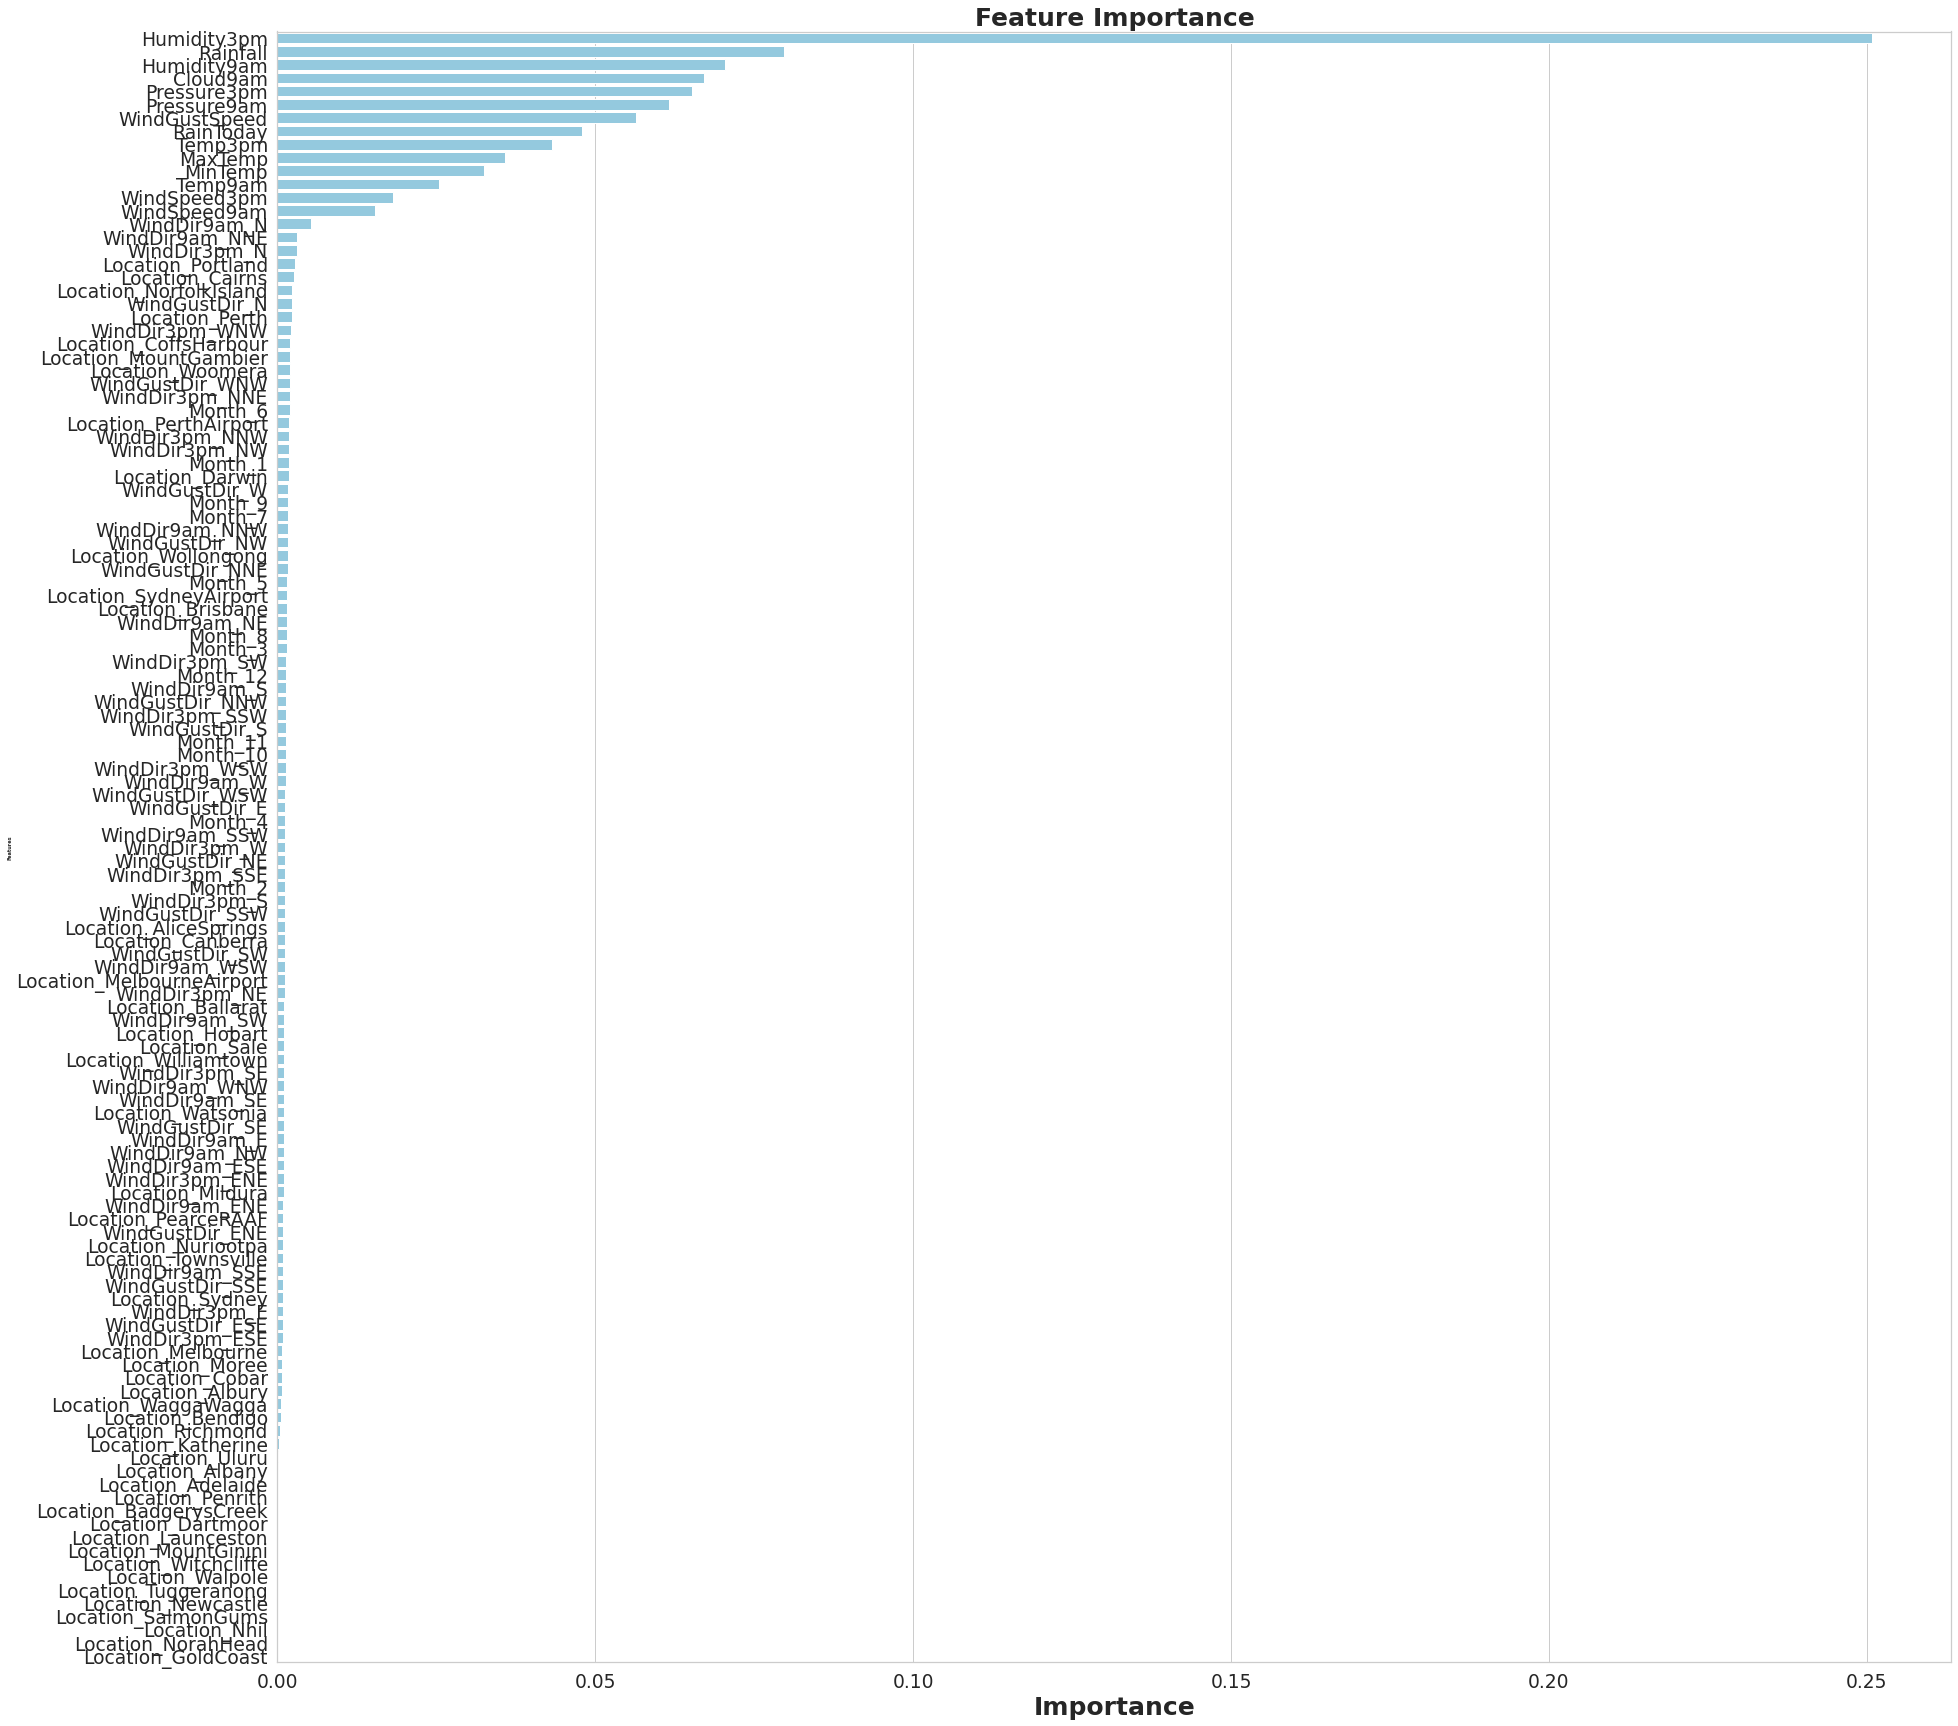

None

,Features,Gini-Importance
0,Humidity3pm,0.250783
1,Rainfall,0.079757
2,Humidity9am,0.070403
3,Cloud9am,0.067092
4,Pressure3pm,0.065272
...,...,...
118,Location_Newcastle,0.000000
119,Location_SalmonGums,0.000000
120,Location_Nhil,0.000000
121,Location_NorahHead,0.000000


In [ ]:
feats = {}
for feature, importance in zip(X_train.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,30)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=5, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)